[0.11875903 0.15397861 0.17473099 0.18948047 0.20092883 0.21028598
 0.21819886 0.22505412 0.23110138 0.23651113]


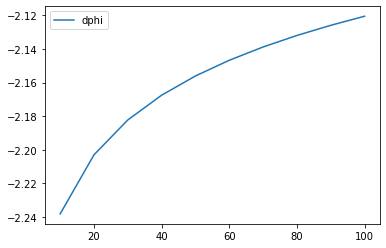

In [95]:
import numpy as np
from math import exp

T=298 #K
n= 2
R=8.314
F=96485
C_an=np.array([.12, .12,0, .12]) #NH4, PO4, Mg, H+. Molar
z_k=np.array([1,-3,2,1])
C_ca=C_an
D_k=np.array([1.98e-9, 0.612e-9,0.705e-9, 9.310e-9])#m2/s from aquion.de

P_H2=.01 #idk
i_o=1 #idk

j_ext=10e-3 #A/cm2
A=1.67 #cm2
#i_ext=j*A
beta=0.5


phi_eq_an=-2.357 #V SHE
phi_eq_ca=0

phi_an=phi_eq_an-(R*T/(n*F)*np.log(C_an[0])) #V
phi_elyte=0.5
phi_ca=phi_eq_ca-(R*T/(n*F)*np.log(P_H2))


from scipy.optimize import fsolve

I_ext=np.array(np.linspace(10,100,10))
#I_ext=10
eta_an=np.zeros_like(I_ext)
g=0     # Counter
# x0=[1e-5]
x0 = 0.2
dphi=np.zeros_like(eta_an)

def eq1(eta):
        eq1 = i_o*(exp((1-beta)*F*eta/(R*T))-exp(-beta*F*eta/(R*T)))-I_ext[g]
        return eq1

for _ in I_ext:
#     root=fsolve(eq1,x0)
#     eta_an[g]=root
    eta_an[g] = fsolve(eq1,x0)
    dphi[g] = eta_an[g] + phi_eq_an
    g+=1
    
print(eta_an)    
from matplotlib import pyplot as plt

plt.plot(I_ext,dphi)
    
plt.legend(['dphi'])









phi_ext=np.array(np.linspace(0,1,10))
i=np.zeros_like(phi_ext)
g=0
# for phi_ext2 in phi_ext:
#     eta_an=phi_ext2-phi_an
#     eta_ca=phi_ext2-phi_ca

#     if eta_an>eta_ca:
#         eta=eta_an
#     else:
#         eta=eta_ca
#     i[g]=i_o*(exp((1-beta)*F*eta/(R*T))-exp(-beta*F*eta/(R*T)))
#     g+=1
